# Mean shift experiments

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import random
from sklearn.datasets import make_blobs
from PIL import Image

(319, 300, 1)


<IPython.core.display.Javascript object>


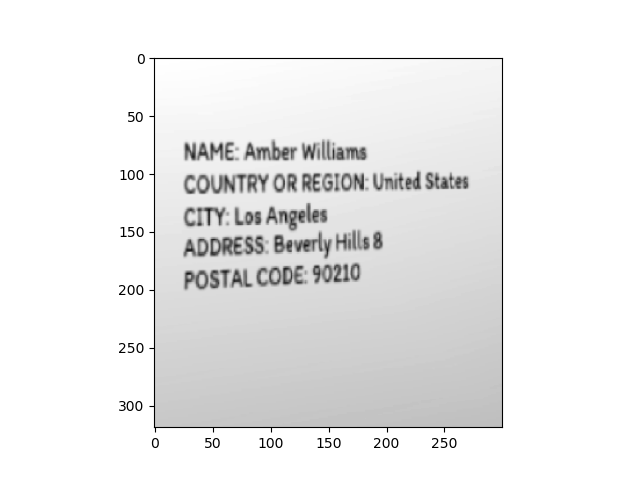

In [5]:
#img = np.asarray(Image.open('../imgs/experiments/segmentation/t_mini.png'), dtype=np.uint32)[:, :, 0:1]
img = np.asarray(Image.open('../imgs/experiments/segmentation/4box_2.png'), dtype=np.uint32)[:, :, 0:1]
print(img.shape)
plt.figure()
plt.imshow(img[:, :, 0], cmap="gray")

In [3]:
X = img.reshape(-1, 1)
print(X.shape)

(95700, 1)


In [4]:
import MeanShift as MeanShift

finalPoints = MeanShift.MeanShift(X, h=75)

KeyboardInterrupt: 

In [111]:
clusterColors = {}
colores = []
cm = list(map(str, finalPoints))

for c in cm:
    if c in clusterColors:
        colores.append(clusterColors[c])
    else:
        newColor = np.random.default_rng().uniform(0,255,3).astype(np.uint8)
        clusterColors[c] = newColor
        colores.append(clusterColors[c])
        
print(clusterColors)

{'[63.83512545]': array([ 59, 231,  77], dtype=uint8), '[64.23707665]': array([185, 114, 239], dtype=uint8), '[80.56909091]': array([136, 107,  14], dtype=uint8), '[85.93211009]': array([109, 141, 173], dtype=uint8), '[122.80836237]': array([158, 210,  82], dtype=uint8), '[230.49311927]': array([ 20, 243,  82], dtype=uint8), '[82.48534799]': array([  0, 239, 125], dtype=uint8), '[84.8305709]': array([ 24, 197,   3], dtype=uint8), '[81.66240876]': array([235, 226, 102], dtype=uint8)}


## Cluster assignation:

In [112]:
print("Number of clusters generated: " + str(len(clusterColors)))

Number of clusters generated: 9


In [113]:
imagen_clusterizada = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint32)
asignaciones2 = np.round(finalPoints.reshape(img.shape[0], img.shape[1]), 3)

for k,v in clusterColors.items():
    imagen_clusterizada[asignaciones2==round(float(k[1:-1]), 3)] = v

<IPython.core.display.Javascript object>


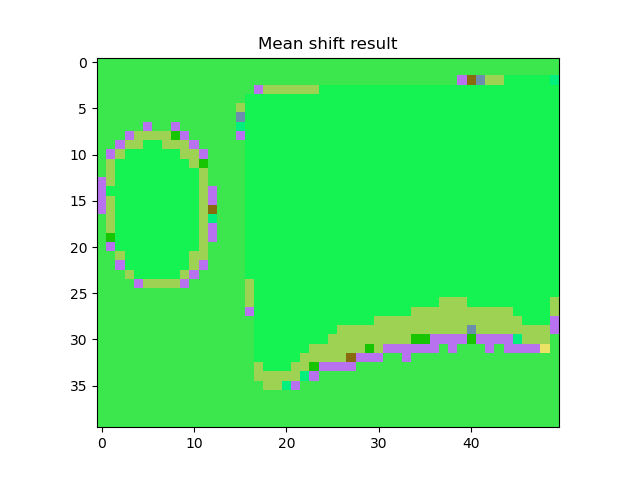

In [114]:
plt.figure()
plt.title("Mean shift result")
plt.imshow(imagen_clusterizada)
plt.show()

<IPython.core.display.Javascript object>


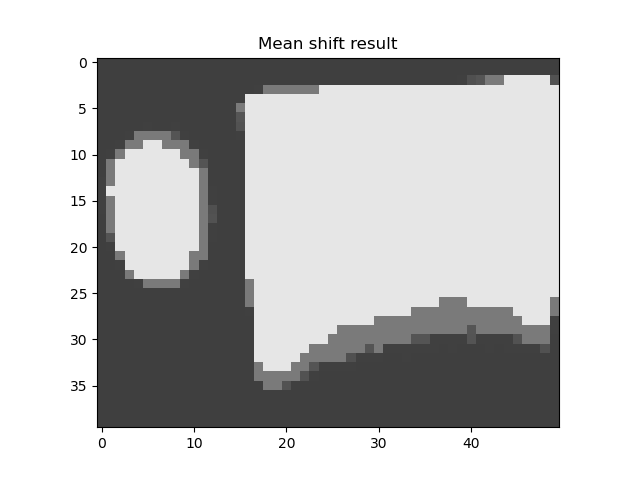

In [115]:
imagen_clusterizada_2 = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint32)

for k,v in clusterColors.items():
    imagen_clusterizada[asignaciones2==round(float(k[1:-1]), 3)] = float(k[1:-1])

plt.figure()
plt.title("Mean shift result")
plt.imshow(imagen_clusterizada)
plt.show()